# **FINAL PROJECT TSDW - Spotify Genre Data**

## **A. Pendahuluan**


### **Deskripsi Dataset**

Dataset ini berisi kumpulan metadata dan fitur audio lagu yang diambil dari **Spotify** menggunakan paket **spotifyr**. Fitur-fitur yang tersedia mencakup karakteristik musikal seperti **danceability**, **energy**, **loudness**, **valence**, **tempo**, **acousticness**, dan **instrumentalness**, yang dihasilkan melalui sistem analisis audio Spotify. Dataset ini terdiri dari sekitar **5000 lagu** yang berasal dari enam genre utama: **EDM**, **Latin**, **Pop**, **R&B**, **Rap**, dan **Rock**. Dengan struktur tersebut, dataset ini sangat cocok untuk analisis pola musikal, perbandingan antar-genre, visualisasi data audio, serta pembuatan model machine learning seperti klasifikasi genre.

### **Alasan Dataset Menarik**

Dataset ini menarik karena menyediakan **fitur audio yang terukur secara objektif** dari ribuan lagu Spotify, sehingga memungkinkan analisis musik berbasis data, bukan sekadar opini subjektif. Dengan adanya fitur seperti **danceability**, **energy**, **valence**, **tempo**, dan lainnya, kita dapat mengeksplorasi pola musikal, membandingkan karakteristik antar-genre, dan membangun model **machine learning** seperti klasifikasi genre atau sistem rekomendasi musik. Selain itu, cakupannya yang mencakup **enam genre populer** membuat dataset ini relevan dan kaya untuk berbagai jenis penelitian musik modern.


### **Pertanyaan / Tujuan Analisis**

1. **Bagaimana hubungan antara popularitas lagu (`track_popularity`) dengan fitur audio seperti `danceability`, `energy`, `valence`, dan `tempo`?**  

2. **Apakah tahun rilis (`track_album_release_date`) mempengaruhi (`tempo`) dan (`valence`)?**  

3. **Bagaimana pola distribusi produksi lagu tiap genre (`playlist_genre`) dari tahun ke tahun (`track_album_release_date`)?**  


## **B. Setup & Package**

### **Library yang Digunakan**

Dalam analisis data ini, digunakan beberapa library Python utama, yaitu:

- **Pandas** – digunakan untuk membaca, membersihkan, dan memanipulasi dataset.
- **Matplotlib.pyplot** – digunakan untuk membuat visualisasi dasar seperti line plot, bar chart, dan scatter plot.
- **Seaborn** – digunakan untuk visualisasi yang lebih informatif dan estetis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
path = "../data/raw/spotify_songs.csv"

## **C. Data Preparation**

### **Import Dataset**

In [27]:
df = pd.read_csv(path)

### **Langkah - Langkah Data Cleaning dan Data Wrangling**

In [31]:
df.select_dtypes(include='number')

track_popularity  danceability  energy  key  loudness  mode  \
0                    66         0.748   0.916    6    -2.634     1   
1                    67         0.726   0.815   11    -4.969     1   
2                    70         0.675   0.931    1    -3.432     0   
3                    60         0.718   0.930    7    -3.778     1   
4                    69         0.650   0.833    1    -4.672     1   
...                 ...           ...     ...  ...       ...   ...   
32828                42         0.428   0.922    2    -1.814     1   
32829                20         0.522   0.786    0    -4.462     1   
32830                14         0.529   0.821    6    -4.899     0   
32831                15         0.626   0.888    2    -3.361     1   
32832                27         0.603   0.884    5    -4.571     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0           0.0583      0.102000          0.000000    0.0653   0.5180   
1           0.0373      0.072400          0.004210    0.3570   0.6930   
2           0.0742      0.079400          0.000023    0.1100   0.6130   
3           0.1020      0.028700          0.000009    0.2040   0.2770   
4           0.0359      0.080300          0.000000    0.0833   0.7250   
...            ...           ...               ...       ...      ...   
32828       0.0936      0.076600          0.000000    0.0668   0.2100   
32829       0.0420      0.001710          0.004270    0.3750   0.4000   
32830       0.0481      0.108000          0.000001    0.1500   0.4360   
32831       0.1090      0.007920          0.127000    0.3430   0.3080   
32832       0.0385      0.000133          0.341000    0.7420   0.0894   

         tempo  duration_ms  
0      122.036       194754  
1       99.972       162600  
2      124.008       176616  
3      121.956       169093  
4      123.976       189052  
...        ...          ...  
32828  128.170       204375  
32829  128.041       353120  
32830  127.989       210112  
32831  128.008       367432  
32832  127.984       337500  

[32833 rows x 13 columns]

In [ ]:
df = df.drop(columns=['track_album_id','track_id','playlist_id'])

In [ ]:
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

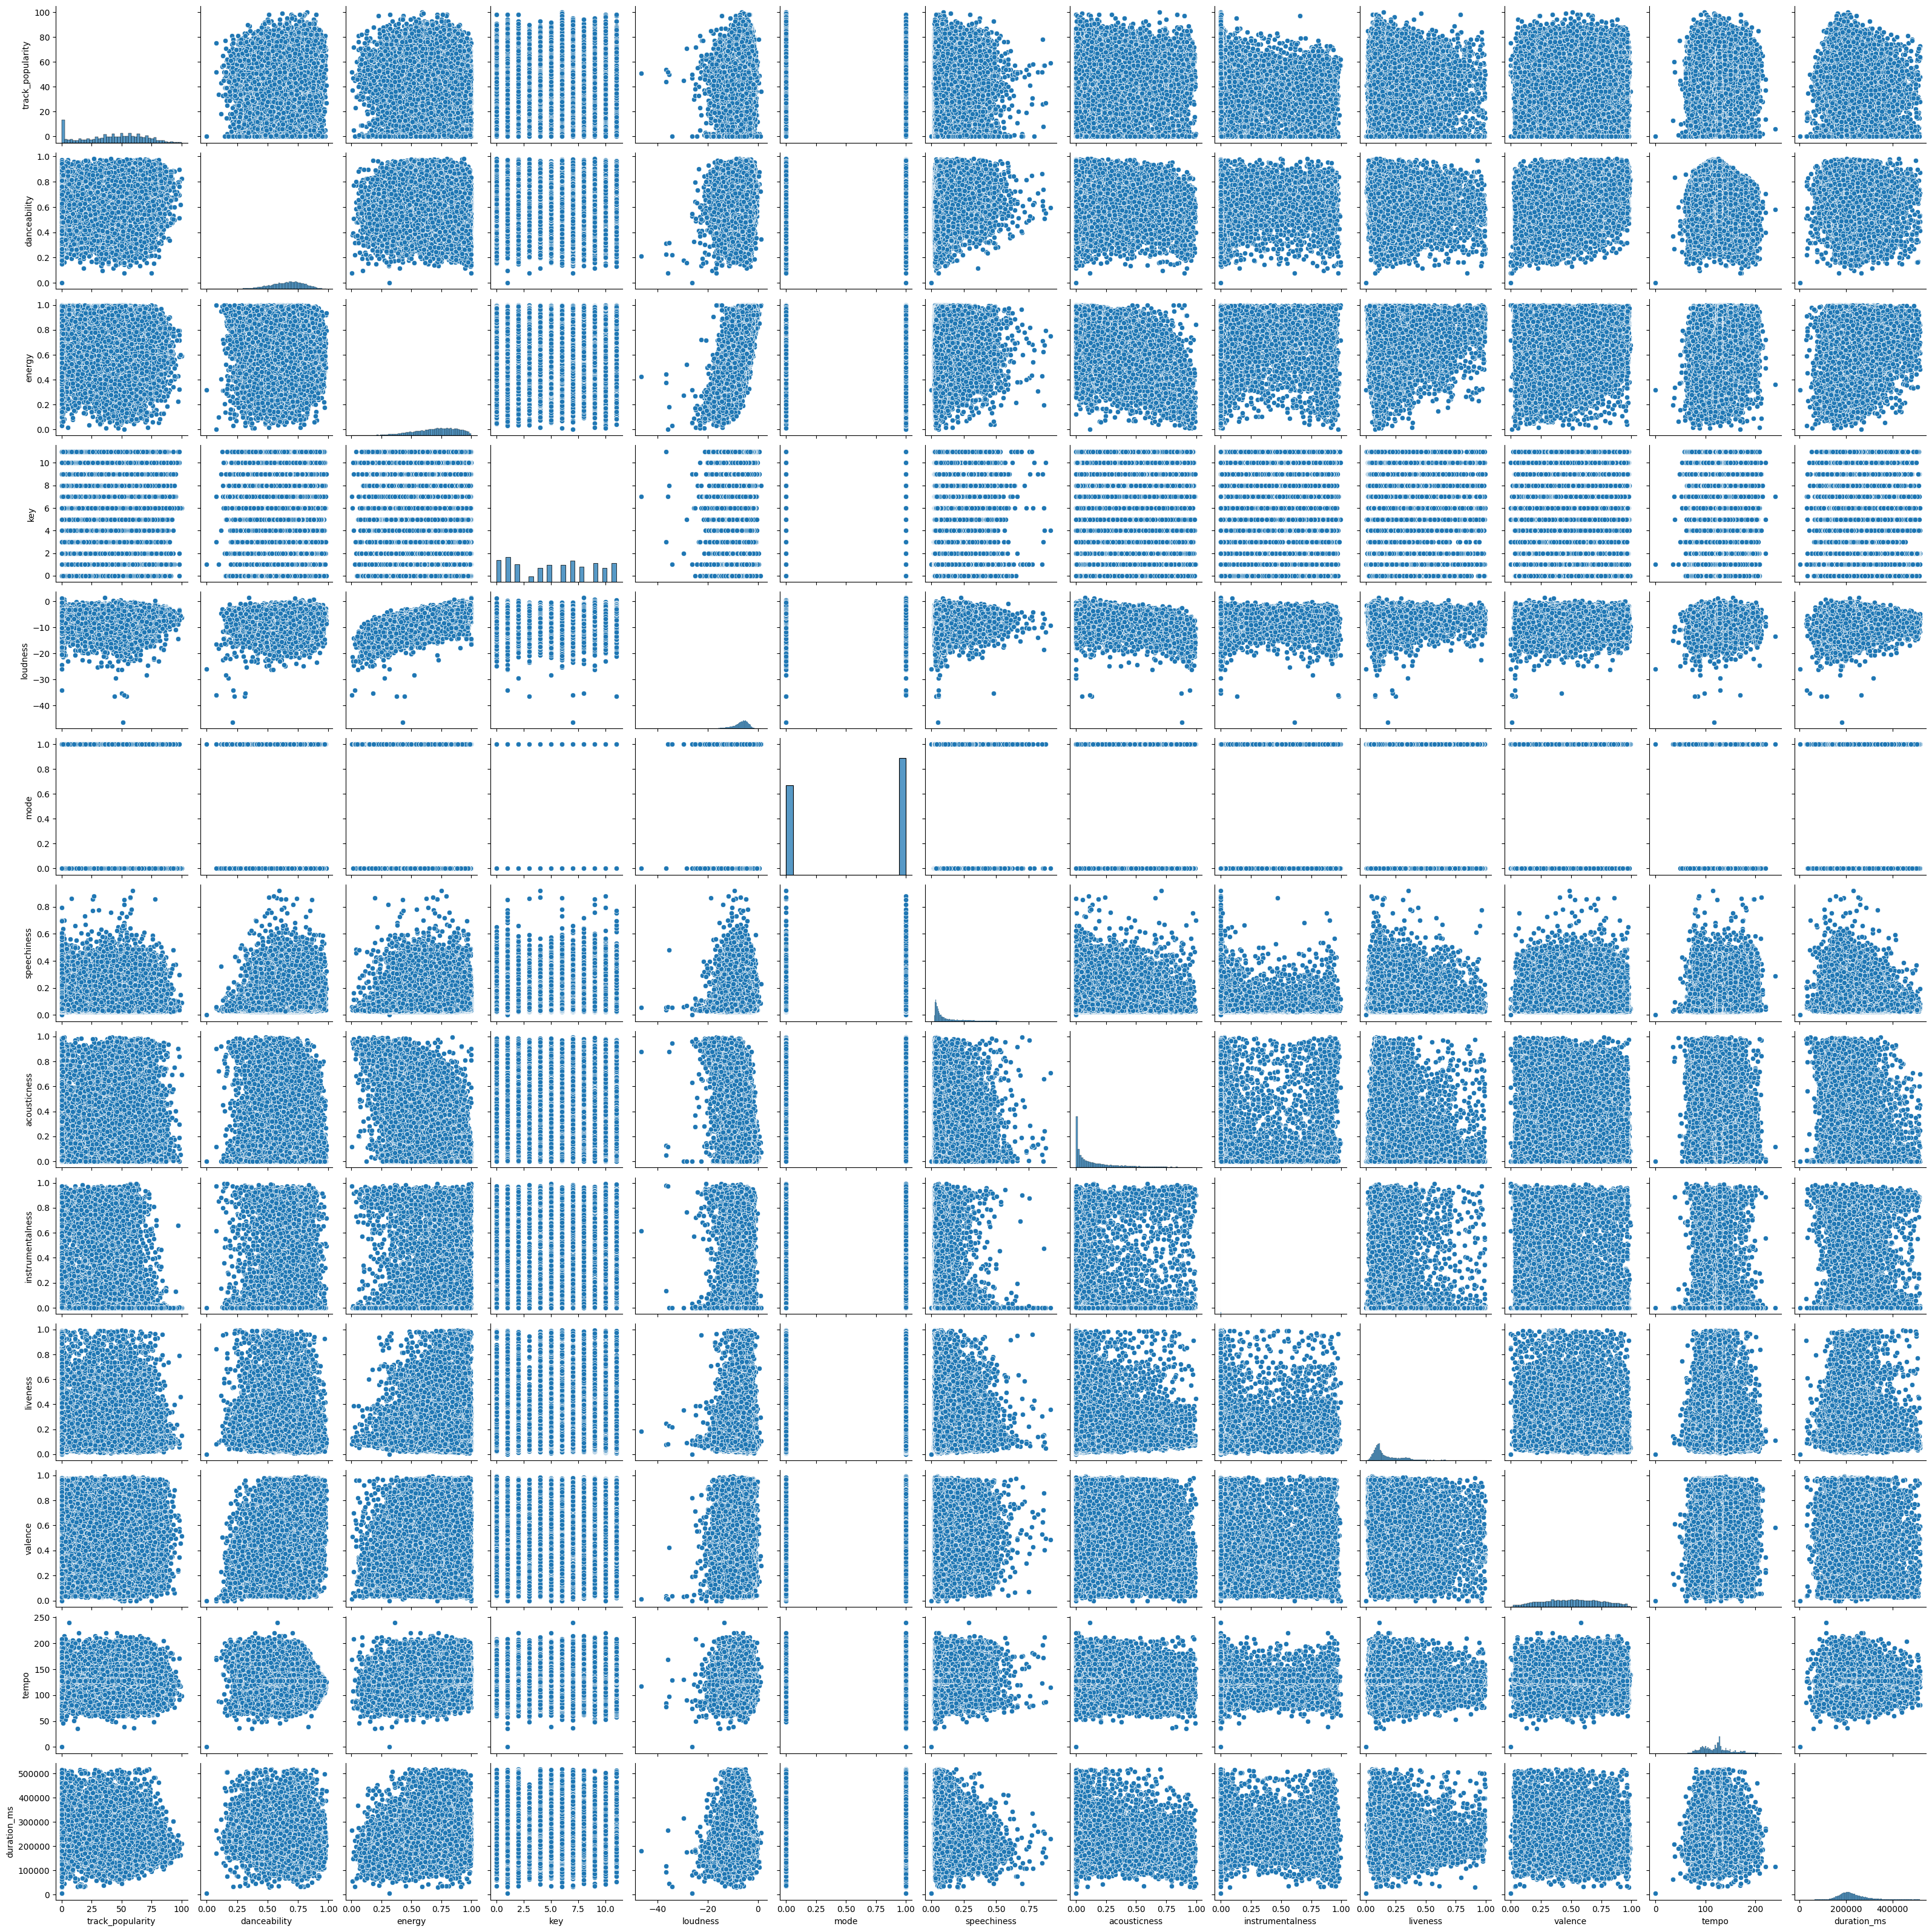

In [ ]:
sns.barplot()

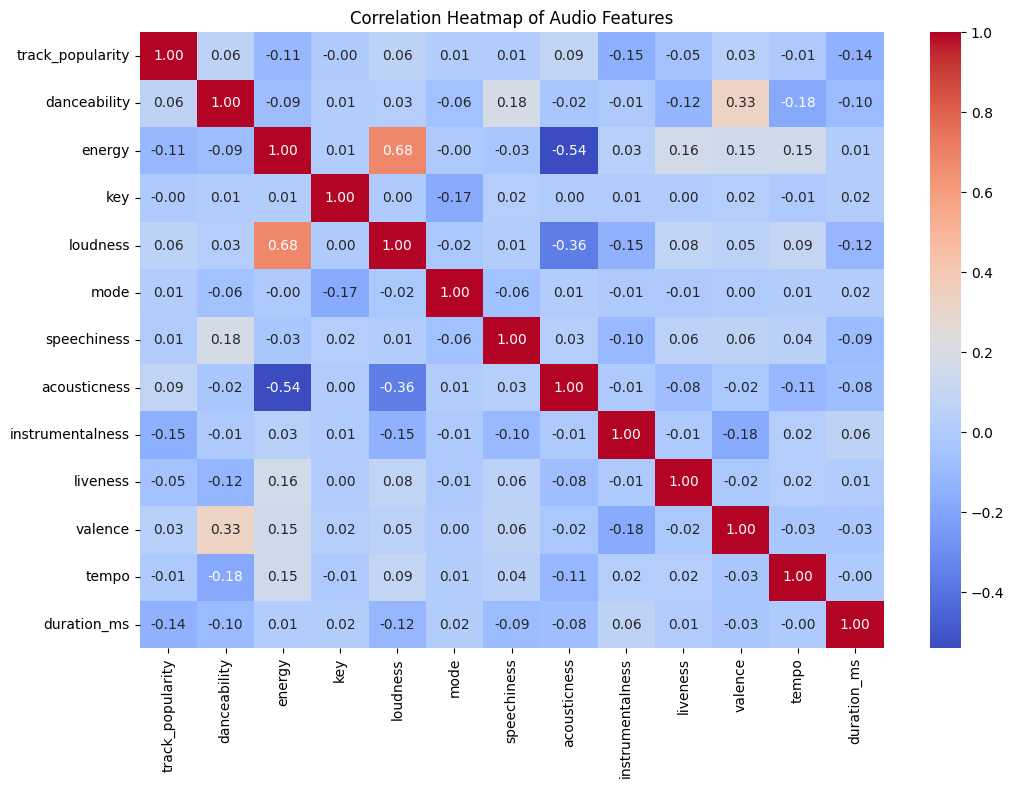

In [40]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

In [32]:
df.select_dtypes(include='object')

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

               track_album_id  \
0      2oCs0DGTsRO98Gh5ZSl2Cx   
1      63rPSO264uRjW1X5E6cWv6   
2      1HoSmj2eLcsrR0vE9gThr4   
3      1nqYsOef1yKKuGOVchbsk6   
4      7m7vv9wlQ4i0LFuJiE2zsQ   
...                       ...   
32828  2azRoBBWEEEYhqV6sb7JrT   
32829  6kD6KLxj7s8eCE3ABvAyf5   
32830  0ltWNSY9JgxoIZO4VzuCa6   
32831  1fGrOkHnHJcStl14zNx8Jy   
32832  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32828                         City Of Lights (Vocal Mix)   
32829                                     Closer Remixed   
32830                       Sweet Surrender (Radio Edit)   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32829               2013-03-08  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  
0                pop                  dance pop  
1                pop                  dance pop  
2                pop                  dance pop  
3                pop                  dance pop  
4                pop                  dance pop  
...              ...                        ...  
32828            edm  progressive electro house  
32829            edm  progressive electro house  
32830            edm  progressive electro house  
32831            edm  progressive electro house  
32832            edm  progressive electro house  

[32833 rows x 10 columns]

# ff